In [112]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [113]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [114]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [115]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [116]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine)

# reflect the tables


In [117]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [118]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station


In [119]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)


In [120]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


# Exploratory Precipitation Analysis

In [121]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()[0]


<Axes: xlabel='Date', ylabel='Amount of Percipitation'>

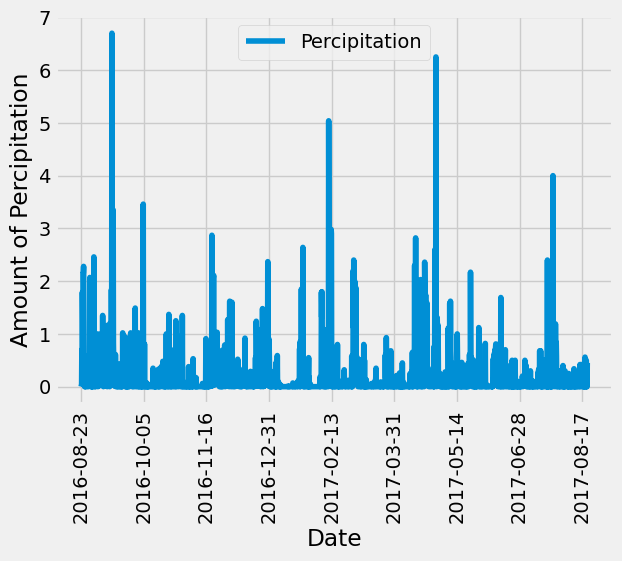

In [122]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365) 

# Perform a query to retrieve the data and precipitation scores
rain_info = session.query(measurement.date,measurement.prcp).\
        filter(func.strftime(measurement.date) >= query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
rain_df = pd.DataFrame(rain_info, columns = ["Date", "Percipitation"])
rain_df.dropna(axis=0, how='any', inplace= True)
rain_df.set_index('Date', inplace = True)



# Sort the dataframe by date
rain_df.sort_values(by='Date', inplace = True)

# Use Pandas Plotting with Matplotlib to plot the data
rain_df.plot(rot=90, xlabel = 'Date', ylabel='Amount of Percipitation')

In [123]:
# Use Pandas to calculate the summary statistics for the precipitation data
rain_df.describe()

,Percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [124]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [125]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(station.station)).first()[0]

9

In [126]:
session.query(station.station).all()


[('USC00519397',),
 ('USC00513117',),
 ('USC00514830',),
 ('USC00517948',),
 ('USC00518838',),
 ('USC00519523',),
 ('USC00519281',),
 ('USC00511918',),
 ('USC00516128',)]

In [127]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_query = session.query(measurement.station,func.count(measurement.station))\
.group_by(measurement.station)\
.order_by(func.count(measurement.station).desc()).all()

most_active = station_query[0][0]

In [137]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp, highest_temp, average_temp =  session.query(func.min(measurement.tobs),\
                                                         func.max(measurement.tobs),\
                                                         func.avg(measurement.tobs))\
                                            .filter(measurement.station == most_active).first()
print(lowest_temp,highest_temp,average_temp)

54.0 85.0 71.66378066378067


Text(0.5, 0, 'Temperature')

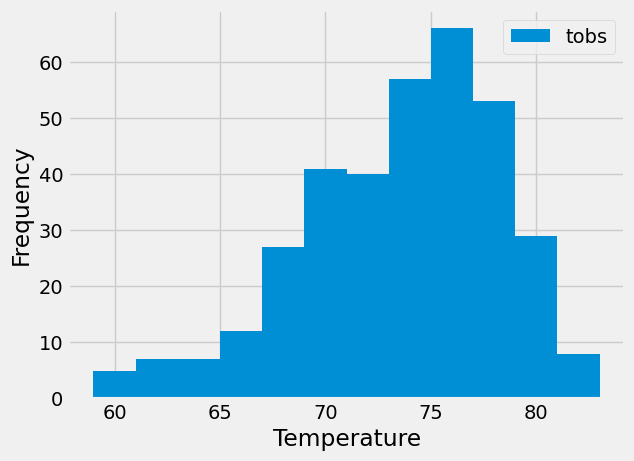

In [135]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_data = session.query(measurement.tobs).filter(measurement.station == most_active).\
        filter(func.strftime(measurement.date) >= query_date).all()

most_active_df = pd.DataFrame(most_active_data, columns=['tobs'])
station_df.plot.hist(bins=12)
plt.xlabel('Temperature')


# Close Session

In [130]:
# Close Session
session.close()